# Analysing Udacity Student Data Corpus

I am carrying out this project as part of a Udacity course on data analysis. All data has been made publically available by Udacity.

In order to test my ability to manipulate this project using standard python analysis libraries, I am limiting my use of external libraries such as pandas and numpy.


## Load Data from CSVs

Initially I will read in the data from enrollments.csv, daily_engagement.csv and project_submissions.csv and store the results into data dictionaries for analysis and manipulation.

enrollments.csv:

Data about a random subset of Data Analyst Nanodegree students who complete
their first project and a random subset of students who do not.

Columns:
    - account_key:    A unique identifier for the account of the student who
                     enrolled.

    - status:         The enrollment status of the student at the time the data
                      was collected. Possible values are 'canceled' and
                      'current'.

    - join_date:      The date the student enrolled.

    - cancel_date:    The date the student canceled, or blank if the student has
                      not yet canceled.

    - days_to_cancel: The number of days between join_date and cancel_date, or
                      blank if the student has not yet canceled.

    - is_udacity:     True if the account is a Udacity test account, False
                      otherwise.

    - is_canceled:    True if the student had canceled this enrollment at the
                      time the data was collected, False otherwise.

-------------------------------------------------------------------------------

daily_engagement.csv:

Data about engagement within Data Analyst Nanodegree courses for each student in
the enrollment table on each day they were enrolled. Includes a record even if
there was no engagement that day. Includes engagement data from both the
supporting courses for the Nanodegree program, and the corresponding freely
available courses with the same content.

Columns:
    - acct:                  A unique identifier for the account of the student
                             whose engagement data this is.

    - utc_date:              The date for which the data was collected.

    - num_courses_visited:   The total number of Data Analyst Nanodegree courses
                             the student visited for at 2 minutes on this day.
                             Nanodegree courses and freely available courses
                             with the same content are counted separately.

    - total_minutes_visited: The total number of minutes the student spent
                             taking Data Analyst Nanodegree courses on this day.

    - lessons_completed:     The total number of lessons within Data Analyst
                             Nanodegree courses on this day.

    - projects_completed:    The total number of Data Analyst Nanodegree
                             projects the student completed on this day.

-------------------------------------------------------------------------------

project_submissions.csv:

Data about submissions for Data Analyst Nanodegree projects for each student in
the enrollment table.

Columns:
    - creation_date:    The date the project was submitted.

    - completion_date:  The date the project was evaluated.

    - assigned_rating:  This column has 4 possible values:
                        blank - Project has not yet been evaluated.
                        INCOMPLETE - Project did not meet specifications.
                        PASSED - Project met specifications.
                        DISTINCTION - Project exceeded specifications.
                        UNGRADED - The submission could not be evaluated
                                   (e.g. contained a corrupted file)

    - account_key:      A unique identifier for the account of the student who
                        submitted the project.

    - lesson_key:       A unique identifier for the project that was submitted.

    - processing_state: This column has 2 possible values:
                        CREATED - Project has been submitted but not evaluated.
                        EVALUATED - Project has been evaluated.


In [2]:
import unicodecsv

## Building readCSV function as I know I will be reading in several CSV files.

def readCSV(file):
    with open(file, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = readCSV('enrollments.csv')
daily_engagement = readCSV('daily_engagement.csv')
project_submissions = readCSV('project_submissions.csv')

In [5]:
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [6]:
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [7]:
project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Fixing the Data Types

Here I create several functions to ensure the data types are in a format that makes sense and then call them on the various data dictionaries I created earlier.

In [8]:
from datetime import datetime as dt

def parse_date(date):
    """Takes a date as a string, and returns a Python datetime object. 
    If there is no date given, returns None"""
    
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    

def parse_maybe_int(i):
    """Takes a string which is either an empty string or represents an integer, and returns an int or None."""
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [9]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [10]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [12]:
## Renaming the "acct" column in the daily_engagement table to "account_key"

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del(engagement_record['acct'])
    



## Investigating the Data

### A few questions which could lead to interesting results

1. Are people who visit more courses more likely to complete more courses?
2. Is there a relationship between the time taken to complete a course and the assigned rating?
3. What is the average number of courses visted?
4. How do students who pass their projects differ from those who do not?
5. How long do students take on average to complete their projects?
6. What is the average time spent on udacity courses?
7. How do engagement rates vary over time?
8. Do less engaged students cancel more?

In [11]:
## Finding the total number of rows and the number of unique students (account keys)
## in each table.

print("No. of enrollments", len(enrollments))
print("No. of daily engagements", len(daily_engagement))
print("No. of project submissions", len(project_submissions))


No. of enrollments 1640
No. of daily engagements 136240
No. of project submissions 3642


### Locating unique accounts

In [15]:
##Locating unique accounts

def unique_acc(table):
    unique_accts = set()
    for record in table:
        unique_accts.add(record['account_key'])
    return unique_accts

print("unique accounts in enrollments: ", len(unique_acc(enrollments)))
print("unique accounts in daily engagement: ", len(unique_acc(daily_engagement)))
print("unique accounts in project submissions: ", len(unique_acc(project_submissions)))

unique_engagement_acc = unique_acc(daily_engagement)

unique accounts in enrollments:  1302
unique accounts in daily engagement:  1237
unique accounts in project submissions:  743


### Missing Engagement Records
I would expect the no. of unique engagement accounts to be the same as enrollment accounts (given I am told by the course that engagement is automatically logged once enrolled into a course, even if the student doesn't visit it)

In [21]:
## To investigate why students is missing from the daily engagement table.

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_acc:
        print(enrollment)
        break

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


The above data point shows tthat this student cancelled on the same day as the join date. I am making an assumption that the way in which udacity collects enrollment data - if they cancel within the same day it will not register as an enrollment but will register as an engagement. 

The udacity course confirms this assumption.

## Checking for More Problem Records

In order to further investigate why the unique engagement accounts are different to unique enrollment accounts, calling the same loop - this time accounting for students who cancel in the same day.

In [23]:
## Finding the number of surprising data points (enrollments missing from the engagement table) that remain, if any.

suprising_points = 0
for enrollment in enrollments:
    student = enrollment['account_key']

    join_date = enrollment['join_date']
    cancel_date = enrollment['cancel_date']
    if student not in unique_engagement_acc and (join_date != cancel_date):
        print(enrollment)
        suprising_points += 1
        
print(suprising_points)

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
3


Here I can see a common theme - that there are only three remaining suprising data points and they all have 'is_udacity' set to 'True'. The table_descriptions file confirms that accounts where 'is_udacity' set to 'True' are Udacity test accounts. 

Below I will remove these accounts.

In [24]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

There are 6 Udacity test accounts.

In [25]:
def remove_udacity_accounts(data):
    """Given some data with an account_key field, removes any records corresponding to Udacity test accounts"""
    non_udacity_data = []
    
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
            
    return non_udacity_data

In [26]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634



# Investigating the following question:  "How do numbers in the daily engagement table differ for students who pass the first project?"

Variables immediately clear which may need to be controlled or they could hinder this question:

- The data_sets includes data from after the first project submission.
- This compares data from different lengths of time i.e. could be comparing data of people over one month vs another over two. This is inconsistent.
- Includes engagement in courses not related to the first project

After looking at potential problem variables in the data, I am refining the question to be limited to the following scope: "Only include engagement from the first week and exclude students who cancelled within the first week (free-trial cancellers)"

## Creating a dictionary to control for the variables above.

This will then be to filter the three data sets in order to enable me to answer this question.

In [29]:
## ToDo: Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. 

paid_students = dict()
for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel'] == None or enrollment['days_to_cancel'] > 7:
        
        account_key = enrollment['account_key']
        enroll_date = enrollment['join_date']
        
         #To ensure we have the most recent enrollment date (students can enroll multiple times), see below code
        
        if account_key not in paid_students \
        or enroll_date > paid_students[account_key]:
        #need the first half as would result in error with just the 2nd bit (IF one of these statements is true)
            paid_students[account_key] = enrollment['join_date'] 
            #above line creates new key and assigns value if account key doesn't exist
            #or over writes existing value, if account key does exist
        
print(len(paid_students))

995


In [30]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data
                      

In [94]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

Below I am adding a new field to the data called 'has_visited_today'. I believe this is a better metric for student than 'num_courses_visited'.

In [92]:
for engagement_record in paid_engagement:
    
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited_today'] = 1
    else:
        engagement_record['has_visited_today'] = 0

In [93]:
print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


### Getting Data from First Week

In [28]:
def within_one_week(join_date, engagement_date):
    
    """Takes a student's join date and the date of a specific engagement record, and returns True 
    if that engagement record happened within one week of the student joining and the engagement 
    is after the enrollment."""
    
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0
    #Second requirement on the return ensures that the time_delta is positive i.e. that it happens 
    #after the enrollment. 

### Putting one week and non-free trial cancellers together
In order to do this I will create a list of rows from the engagement table including only rows where the student is one of the paid students, and the date is within one week of the student's join date.



In [32]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:

    account_key = engagement_record['account_key']
    join_date = paid_students[account_key] #looking up the students join date using the paid_students dictionary
    #where keys are account keys and values are join dates
    
    if engagement_record['account_key'] in paid_students and \
    within_one_week(join_date, engagement_record['utc_date']):

        paid_engagement_in_first_week.append(engagement_record)
    
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In order to get an understanding of student engagement, I want to compare how for each student the following data varies:

- total minutes spent engaged by each student in first week
- total lessons completed by each student in first week
- amount of visits in first week

To do this I group the data records by the account name, then find the sum of eachof the above variables and then review descriptive statistics to describe the date (mean, st. dev, max, min)

In [77]:
from collections import defaultdict

def group_data(data, key_name):
    """This function groups data by a key name
    1st arg: a data set that needs grouping in the form of a dictionary
    2nd arg: the key name (column) to be grouped"""

    grouped_data = defaultdict(list)
    for record in data:
        key = record[key_name]
        
        grouped_data[key].append(record)
    
    return grouped_data
        #(before fullstop) if existing looks up to the account_key, if non-exisitng, new key is created (with the account key)
        # (after fulll stop) adds the value to the relevant account key
        


In [84]:
# ToDo: Create a dictionary of engagement grouped by student.

grouped_engagements_by_account = group_data(paid_engagement_in_first_week, 'account_key')
# The keys are account keys, and the values are lists of engagement records (inc account_key field).

#grouped_engagements_by_account['1']

In [36]:
def sum_grouped_items(grouped_data, field_name):
    """ Creates a dictionary with the sum total of a metric related to each group (e.g. student).
    The keys are account keys, and the values are numbers (e.g. total minutes)
    
    1st arg: A data dictionary grouped according to one field (the key)
    2nd arg: The field (column) in the values to sum """
    
    summed_data = {}
    
    for account_key, data_points in grouped_data.items():
        summed_value = 0
        
        #Iterate through the data_points within the group and sum them
        for data_point in data_points:
            summed_value += data_point[field_name]
            
        summed_data[account_key] = summed_value #assign summed value to key
    
    return summed_data

The describe_data function below is built to display several descriptive statistics about a distribution.

In [85]:
summed_minutes_acc = sum_grouped_items(grouped_engagements_by_account, 'total_minutes_visited')
summed_lessons_acc = sum_grouped_items(grouped_engagements_by_account, 'lessons_completed')
summed_visits_acc = sum_grouped_items(grouped_engagements_by_account, 'has_visited_today')

In [86]:
import seaborn as sns
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

def describe_data(summed_data_dict):
    """Displays mean, st. dev, min & max for a data distribution
    
    Takes a 1D dictionary as an argument"""
    
    summed_data_values = list(summed_data_dict.values())

    print ('Mean:', np.mean(summed_data_values))
    print ('Standard deviation:', np.std(summed_data_values))
    print ('Minimum:', np.min(summed_data_values))
    print ('Maximum:', np.max(summed_data_values))
    plt.hist(summed_data_values, bins=7)
    

Populating the interactive namespace from numpy and matplotlib


Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


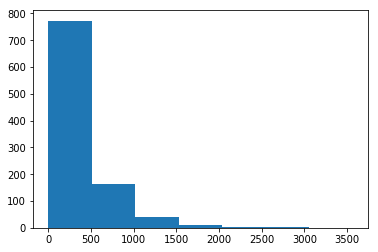

In [87]:
describe_data(summed_minutes_acc)

### Lessons Completed in First Week

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


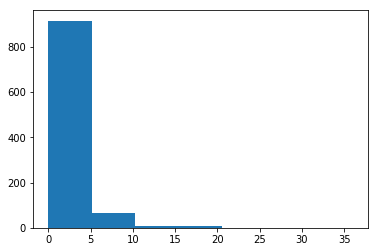

In [88]:
describe_data(summed_lessons_acc)

### Number of Visits in First Week

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


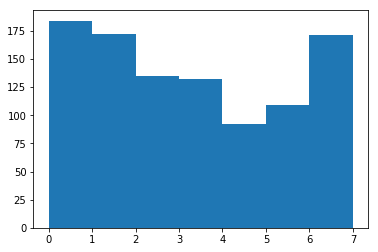

In [96]:
#ToDo: Call sum_grouped_items on the has_visited field
summed_days_visited = sum_grouped_items(grouped_engagements_by_account, 'has_visited_today')
describe_data(summed_days_visited)

## Splitting out Passing Students

In order to compare the two types of students from my question, (i.e."How donumbers in the daily engagement table differ for students who pass the first project?") i'm going to separate  students who pass the subway project  and those who don't. 

At the time of data collection, The subway project was the most common first project.

In [97]:
paid_enrollments[0]

OrderedDict([('account_key', '429'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)),
             ('days_to_cancel', 120),
             ('is_udacity', False),
             ('is_canceled', True)])

In [98]:
paid_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0'),
             ('has_visited_today', 1)])

In [99]:
paid_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [100]:
######################################
#                 11                 #
######################################

## ToDo: Create two lists of engagement data for paid students in the first week.
## The first list to contain data for students who eventually pass the subway project and
## The second list to contain data for students who do not.

#ToDo: Form data list/dictionary (passed_submissions) for submissions that have an assigned rating of passed and
#have a lesson key of '746169184', '3176718735'

subway_project_lesson_keys = ['746169184', '3176718735']

passed_submissions = set()

for submission in paid_submissions:
    int(submission['account_key'])
    if (submission['assigned_rating'] == 'PASSED' or submission['assigned_rating'] == 'DISTINCTION') and \
    submission['lesson_key'] in subway_project_lesson_keys:
        passed_submissions.add(submission['account_key'])


In [101]:
#ToDo: Loop through paid engagement in first week - if the account key is present in passed_submissions, 
#add to one list, else add to another

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in passed_submissions:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
        
print(len(paid_engagement_in_first_week))
print(len(passing_engagement))
print(len(non_passing_engagement))

6919
4527
2392


## Comparing the Two Student Groups

Here I  see how certain metrics differ for students who pass the subway project vs. students who don't. 

### Total Minutes Visited

Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


Text(0.5, 1.0, 'Frequency of students vs the amount of time they spend in their first week \n (students who eventually pass their first project)')

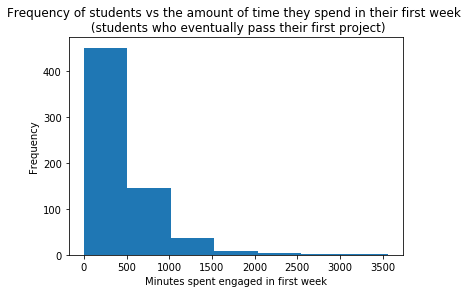

In [109]:
grouped_passing_engagement_acc = group_data(passing_engagement, 'account_key')
summed_passing_engagement_min = sum_grouped_items(grouped_passing_engagement_acc, 'total_minutes_visited')
describe_data(summed_passing_engagement_min)
plt.xlabel('Minutes spent engaged in first week')
plt.ylabel('Frequency')
plt.title('Frequency of students vs the amount of time they spend in their first week \n (students who eventually pass their first project)')

Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


Text(0.5, 1.0, 'Frequency of students vs the amount of time they spend in their first week \n (students who never pass a project)')

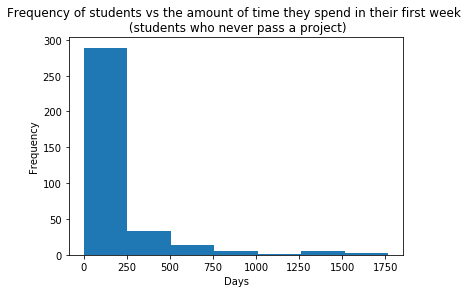

In [110]:
grouped_non_passing_engagement_acc = group_data(non_passing_engagement, 'account_key')
summed_non_passing_engagement_min = sum_grouped_items(grouped_non_passing_engagement_acc, 'total_minutes_visited')
describe_data(summed_non_passing_engagement_min)
plt.xlabel('Days')
plt.ylabel('Frequency')### Total Minutes Visited
plt.title('Frequency of students vs the amount of time they spend in their first week \n (students who never pass a project)')

### Total Lessons Completed

Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


Text(0.5, 1.0, 'Frequency of students vs lessons completed in first week \n (students who eventually pass their first project)')

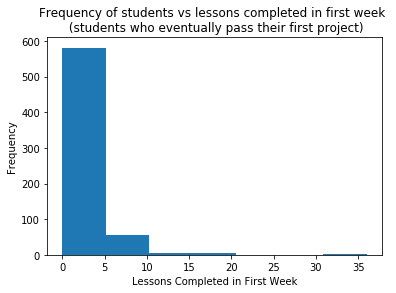

In [111]:
summed_passing_engagement_lessons = sum_grouped_items(grouped_passing_engagement_acc, 'lessons_completed')
describe_data(summed_passing_engagement_lessons)
plt.xlabel('Lessons Completed in First Week')
plt.ylabel('Frequency')
plt.title('Frequency of students vs lessons completed in first week \n (students who eventually pass their first project)')

Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


Text(0.5, 1.0, 'Frequency of students vs lessons completed in first week \n (students who never pass a project)')

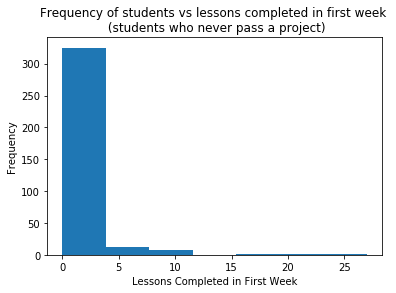

In [112]:
summed_non_passing_engagement_lessons = sum_grouped_items(grouped_non_passing_engagement_acc, 'lessons_completed')
describe_data(summed_non_passing_engagement_lessons)
plt.xlabel('Lessons Completed in First Week')
plt.ylabel('Frequency')
plt.title('Frequency of students vs lessons completed in first week \n (students who never pass a project)')

Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


Text(0.5, 1.0, 'Number of student visits in the first week for students who eventually pass their first project')

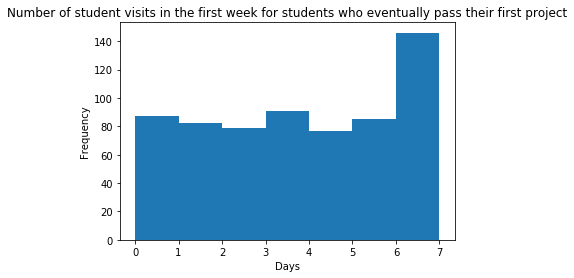

In [113]:
summed_passing_engagement_visits = sum_grouped_items(grouped_passing_engagement_acc, 'has_visited_today')
describe_data(summed_passing_engagement_visits)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Number of student visits in the first week for students who eventually pass their first project')

Passing students are equally likely to visit each day in their first week. They are slightly more likely to visit every day than any other amount of days

For non_passing students (Students who haven't yet passed their first engagement), the trend shows less and less students are in each bucket as the bucket corresponds to more days.

Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


Text(0.5, 1.0, 'Number of student visits in the first week for students who never pass a first project')

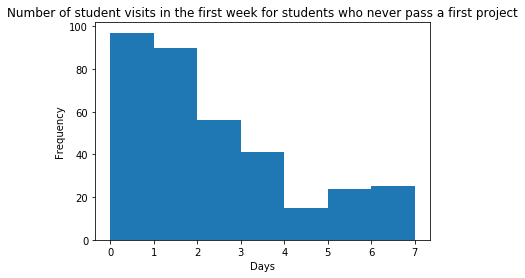

In [114]:
summed_non_passing_engagement_visits = sum_grouped_items(grouped_non_passing_engagement_acc, 'has_visited_today')
describe_data(summed_non_passing_engagement_visits)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Number of student visits in the first week for students who never pass a first project')

## Reviewing a new metric

I hypothesize that those people who visit less courses per day are more likely to pass their first project (i.e. they have more focus)

In [115]:
#To figure out whether my hypothesis is correct,

#ToDo: Group num courses visited by student
#Data is already grouped  - grouped_passing_engagement_acc and grouped_non_passing_engagement_acc

#ToDo: Sum num courses per student
summed_passing_engagement_course = sum_grouped_items(grouped_passing_engagement_acc, 'num_courses_visited')
summed_non_passing_engagement_course = sum_grouped_items(grouped_non_passing_engagement_acc, 'num_courses_visited')

#ToDo: Find mean num courses per student and deviations to see if they are significantly different

Mean: 4.726429675425039
Standard deviation: 3.7002397793039687
Minimum: 0
Maximum: 25


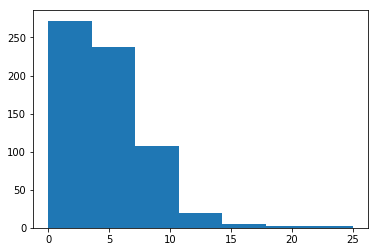

In [116]:
describe_data(summed_passing_engagement_course)

Mean: 2.589080459770115
Standard deviation: 2.906709690253102
Minimum: 0
Maximum: 18


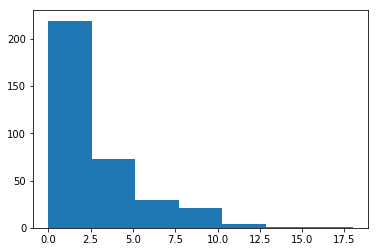

In [117]:
describe_data(summed_non_passing_engagement_course)

My hypothesis was incorrect. It appears students who go on to pass their first engagement are actually more likely to try more courses in their first week.